In [41]:
# import sys
# import torch
# import torchvision
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# from numpy import linalg as LA
import cv2

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Load Image

B, G, R pixel colors respectively are:  [60 62 96]
Image dimensions:  (1944, 2592, 3)
Image height:  1944
Image width:  2592
Image Data type:  <class 'numpy.ndarray'>
Pixel Data type:  uint8


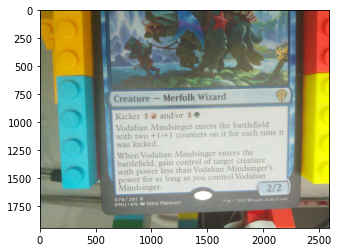

In [43]:
# Using cv2.imread() method
img = cv2.imread("test9.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img_rgb)

# Print R, G, B pixel values at (0,0)
bgr_pixel_values = img[0,0]
print("B, G, R pixel colors respectively are: ", bgr_pixel_values)

# Print image dimensions
img_dimensions = img.shape
img_height = img.shape[0]
img_width = img.shape[1]
channels = img.shape[2]
print("Image dimensions: ", img_dimensions)
print("Image height: ", img_height)
print("Image width: ", img_width)

# Rotate image
img_rgb = cv2.rotate(img_rgb, cv2.ROTATE_180)

#sharpen image
#img_rgb = cv2.filter2D(img_rgb, -1, kernel) 

# Print Image data type
print("Image Data type: ", type(img))
# Print Pixel data type
print("Pixel Data type: ",img.dtype)
plt.imshow(img_rgb)

(435, 580, 3)


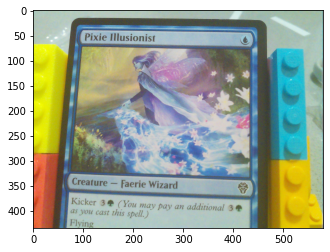

In [260]:
# width = 580
# r = width / float(img_width)
# dim = (width, int(img_height * r))

# # resize the image
# smaller_rgb = cv2.resize(img_rgb, dim, interpolation = cv2.INTER_AREA)

# #smaller = cv2.resize(img, (720, 1280))
# print(smaller_rgb.shape)
# # smaller_rgb = cv2.cvtColor(smaller, cv2.COLOR_BGR2RGB)
# plt.imshow(smaller_rgb)

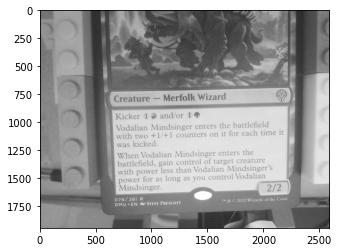

In [44]:
# rgb_weights = [0.3, 0.59, 0.11] # weights for RGB based on the formula above
# img_gray = np.dot(smaller_rgb[...,:3], rgb_weights) # apply formula to image
# img_gray = cv2.convertScaleAbs(img_gray)  # Convert to 8-bit unsigned integer
# print(img_gray.shape)
# print(img_gray.dtype)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap=plt.get_cmap("gray")) # Plot gray image

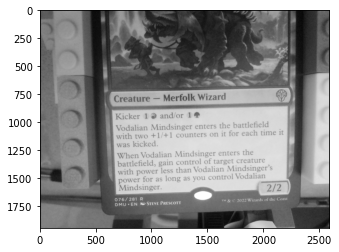

In [45]:
# Blurring
# img_blur = cv2.blur(img_gray,(2,2))
#img_blur = cv2.medianBlur(img_gray, 11)
# Remove noise using a Gaussian filter 
img_blur = cv2.GaussianBlur(img_gray, (7, 7), 0) 
plt.imshow(img_blur, cmap=plt.get_cmap("gray"))

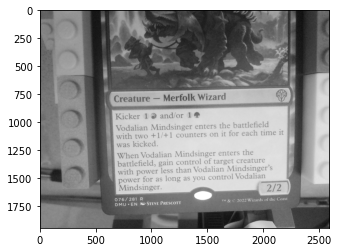

In [46]:
## SHARPEN IMAGE
# Create the sharpening kernel 
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  
# Sharpen the image 
img_gray = cv2.filter2D(img_blur, -1, kernel) 
#img_gray = cv2.Laplacian(img_gray, cv2.CV_64F) 
plt.imshow(img_gray, cmap=plt.get_cmap("gray")) # Plot gray image

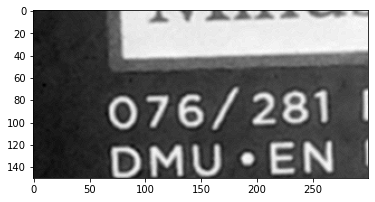

In [47]:
# Crop image to just get text
# cropped_image = img_gray[600:780, 650:1500] # for test1.jpg
# cropped_image = img_gray[80:380, 400:2000] #for test2.jpg
# cropped_image = img_gray[270:450, 400:2000] #for test3.jpg
cropped_image = img_gray[1600:1750, 600:900] #for test5.jpg
cv2.imwrite("cropped_image.jpg", cropped_image)
plt.imshow(cropped_image, cmap=plt.get_cmap("gray"))


In [57]:
cropped_image[85][71]

213

076/ 281 |
DMU-EN |



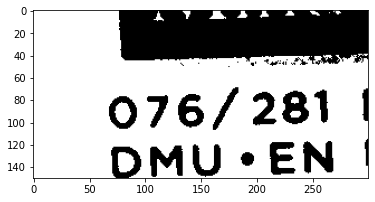

In [60]:
def get_text(img):
    lower = 150
    upper = 230 #300
    #img = cv2.imread(img_name)
    img_rgb_inrange = cv2.inRange(img, lower, upper)
    neg_rgb_image = ~img_rgb_inrange
    plt.imshow(neg_rgb_image, cmap='gray')
    # cv2.imwrite('neg_img_rgb_inrange.png', neg_rgb_image)
    data = pytesseract.image_to_string(neg_rgb_image, lang='eng')
    return data
print(get_text(cropped_image))


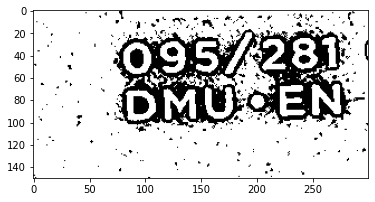

In [381]:
# Threshold image and convert it to black-white
# https://www.freecodecamp.org/news/getting-started-with-tesseract-part-ii-f7f9a0899b3f/
# img_bw = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
img_bw = cv2.adaptiveThreshold(cropped_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 49, 11)
# img_bw = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img_bw, cmap=plt.get_cmap("gray"))

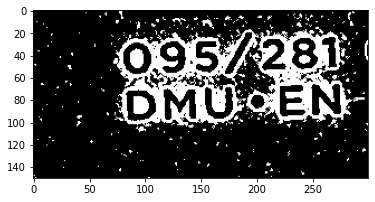

In [382]:
# Invert image
img_inv_bw = ~img_bw
plt.imshow(img_inv_bw, cmap=plt.get_cmap("gray"))

In [377]:
# Find contours (continuous blobs of pixels) the image
contours, hierarchy = cv2.findContours(img_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Show the total number of contours that were detected
print('Total number of contours detected: ' + str(len(contours)))

Total number of contours detected: 2


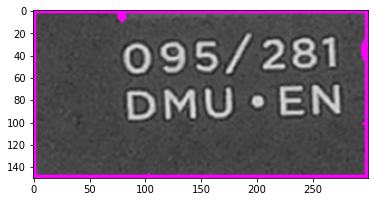

In [378]:
img_copy = cropped_image.copy()
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_GRAY2RGB)
img_contours = cv2.drawContours(img_copy, contours, -1, (255,0,255), 3)
plt.imshow(img_contours, cmap=plt.get_cmap("gray"))
# cv2.imshow("contour", img_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [324]:
import numpy as np
img_copy2 = cropped_image.copy()
# Iterate through contours
areas = []
img_regions = []
for contour in contours:
    threshold_area = 300
    # Calculate contour area
    area = cv2.contourArea(contour)
    areas.append(area)
    # You may apply additional filtering based on area or other properties
    # For example, you can skip contours that are too small or too large
    if area > threshold_area:
        # Draw the contour on the original image for visualization (optional)
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
        
        # Extract the object in this contour
        x, y, w, h = cv2.boundingRect(contour)
        #object_roi = img[y:y+h, x:x+w]
        img_regions.append((x, y, w, h))
        # Now 'object_roi' contains the object within this contour
        # You can further process or save it as necessary
char_imgs = []
 # Save each character as a single image
for x, y, w, h in img_regions:
    # Extract character from image with 2px margin
    char_img = img_copy2[y - 2:y + h + 2, x - 2:x + w + 2]
    # Save character images
    char_imgs.append(char_img)      

     
# Calculate the average
average = np.mean(areas)
max_num = max(areas)
min_num = min(areas)
# Print the average
print("The average is:", average)
print("The max_num is:", max_num)
print("The min_num is:", min_num)

The average is: 245.74455313472654
The max_num is: 459867.0
The min_num is: 0.0


37


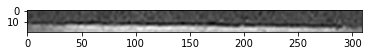

In [334]:
print(len(char_imgs))
plt.imshow(char_imgs[36], cmap='gray')

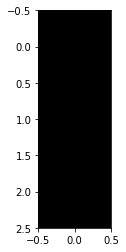

In [255]:
for i,c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c)
    box = cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (36,255,12), 1)
    new_image = cropped_image[y:y+h, x:x+w]

cv2.imwrite("new_img.png", new_image)
plt.imshow(new_image, cmap=plt.get_cmap("gray"))
# cv2.imshow('image', image)
# cv2.waitKey()

In [180]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th2, cmap=plt.get_cmap("gray"))

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


In [112]:
cv2.imwrite("cropped_img.png", cropped_image)

True

In [9]:
from PIL import Image
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
#print(pytesseract)

In [395]:
d = pytesseract.image_to_data(text_extract, output_type=Output.DICT)
print(d)
text = d['text']
print(text)
sentence = " ".join(text)
print(sentence.strip())


TesseractError: (1, 'Error, cannot read input file C:\\Users\\yenling\\Documents\\UW_EE_PMP\\EE522_Embedded_Real_Time_Systems\\095\\281 dmu -en : No such file or directory Error during processing.')

In [397]:
custom_config = r'--oem 3 --psm 6'
string = pytesseract.image_to_string(text_extract, config=custom_config)
print(string)

TesseractError: (1, 'Error, cannot read input file C:\\Users\\yenling\\Documents\\UW_EE_PMP\\EE522_Embedded_Real_Time_Systems\\095\\281 dmu -en : No such file or directory Error during processing.')